### Extract climate data from HYRAS files

The HYRAS dataset from the German Metereological Service (DWD) contents metereological information in grid format of 5x5 km$^2$ resolution. This information is derived from observed data from metereological stations (1951-2015).

The metereological variables to train the models consist of : mean temperature, precipitation and relative humidity. 

In [1]:
#Import libraries

%matplotlib notebook
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

from functions import *

In [2]:
rpath="D:/Data/students/mariana/data/" #Root path
SHP=gpd.read_file(rpath+"/SHP/GWF2.shp")
pr=netcdfdata(file= netcdfFiles(rpath+"/Gesamtdatensatz/pr_hyras/"), \
              shp=SHP, variable= "pr")
rh=netcdfdata(file= netcdfFiles(rpath+"/Gesamtdatensatz/hurs_hyras/"), \
              shp=SHP, variable= "hurs",lat=pr.lat, lon=pr.lon)
tm=netcdfdata(file= netcdfFiles(rpath+"/Gesamtdatensatz/tas_hyras/"), \
              shp=SHP, variable= "tas", lat=pr.lat, lon=pr.lon)

In [3]:
#Extract precipitation data
#datapr=pr.extractTS()
#save data
#datapr.to_pickle(rpath+"/data/Pickle/datapr.pkl") 
#Extract relative humidity data
datarh=rh.extractTS()
datarh.to_pickle(rpath+"/data/Pickle/datarh.pkl") 
#Extract temperature data
#datatm=tm.extractTS()
#datatm.to_pickle(rpath+"/data/Pickle/datatm.pkl") 

505


OSError: Cannot save file into a non-existent directory: 'D:\Data\students\mariana\data\data\Pickle'

In [308]:
#Print information about the netCDF file
tm.data

<class 'netCDF4._netCDF4.MFDataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Tue Oct 17 06:34:28 2017: cdo remapcon,/kp/kpbkp/hyras/progs/hyras4episodes/ReKliEs-De_Grid -setgrid,/kp/kpbkp/reklies-de/intpol/PREPROCESSING/ETRS_05.griddes2 /kp/kp01/hyras/tmp/tas/tas_hyras_5_1951_v2.0.nc /kp/kp01/hyras/output/hyras4episodes/tas/v2.0/tas_hyras4episodes_12.5_1951_v2.0.nc
    source: surface observation
    institution: Deutscher Wetterdienst
    title: gridded_mean_temperature_dataset_(HYRAS-TAS)
    project_id: Expertennetzwerk
    realization: v2.0
    contact: Stefan Kraehenmann, stefan.kraehenmann@dwd.de; Simona Hoepp, Simona-Andrea.Hoepp@dwd.de
    creation_date: 2017-04-23T07:33:15z
    conventions: CF-1.6
    conventionsURL: http://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html
    tracking_id: d918bd68-5367-4019-b56e-13d55e663a65
    CDO: Cl

## Plot data netCDF data

The data is in monthly resolution, therefore the maps are also pointing out towards an specific day

<IPython.core.display.Javascript object>


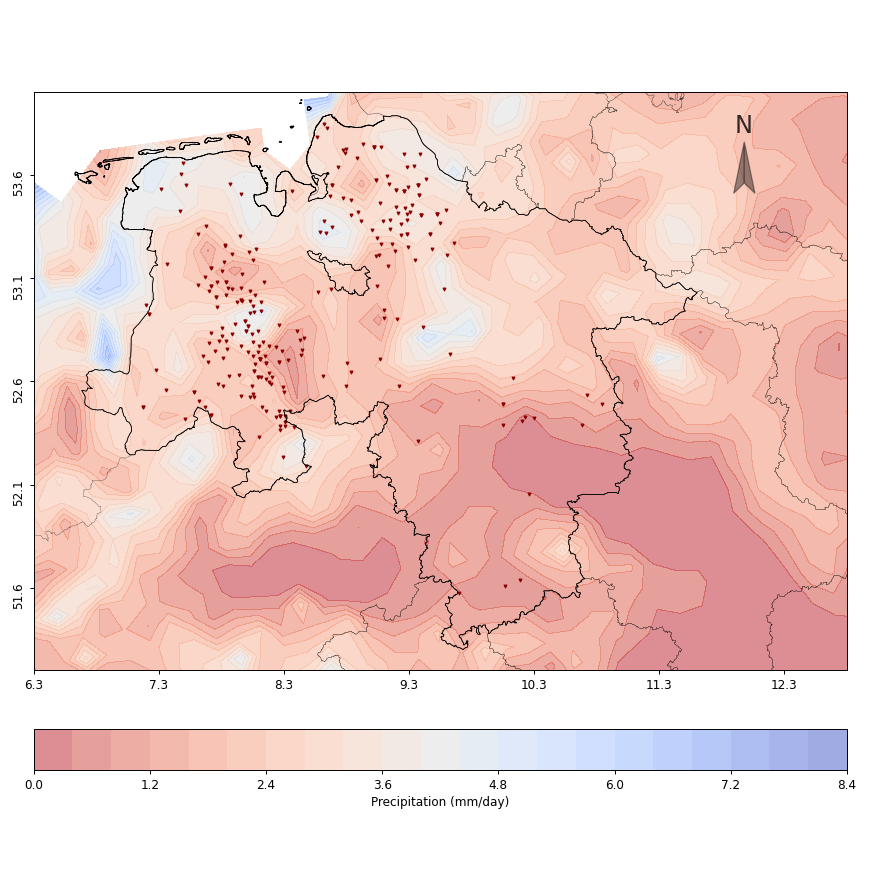

In [336]:
#Longitude and latitude from the precipitation file \
# but used for relative humidity since both datasets have the same dimensions
lon = pr.lon
lat = pr.lat

#Clip the nc by the bounding plot
i0, i1=217, 247  #index of lat
j0, j1 =191, 232  #index of lon

lat_bd, lon_bd= [51.2,54], [6.3,12.8]
lat_inds=np.where((lat>lat_bd[0]) & (lat < lat_bd[1]))
lon_inds=np.where((lon>lon_bd[0]) & (lon < lon_bd[1]))

#NSmap= germany_states.boundary.plot( figsize=(8, 8), alpha=0.5, edgecolor='k', linewidth=1)
#plt.contourf(lon[:], lat[:], pr.data['pr'][0,:,:], 20, cmap=plt.get_cmap('Oranges'))

germany_states = gpd.read_file(rpath+"/SHP/DEU_adm1.shp")
GWF=gpd.read_file(rpath+"/SHP/GWF.shp")

NS=germany_states[germany_states.NAME_1== "Niedersachsen"]
GWF=GWF.to_crs(epsg=4326)
germany=germany_states.boundary.plot(figsize=(10,10), edgecolor='k', lw=0.2)
NS_plot=NS.boundary.plot(figsize=(15,15), edgecolor='k', lw=0.7, ax=germany)
cf=plt.contourf(lon[i0:i1,j0:j1], 
             lat[i0:i1,j0:j1],
             pr.data['pr'][0,i0:i1,j0:j1], 
             20, cmap=plt.get_cmap('coolwarm_r'), alpha=0.5)
GWF.plot(ax=NS_plot,marker='v', color='darkred', markersize=5, label="GW")
fig= germany.get_figure()


limx=6.3
limy=51.2
germany.set_xlim(6.3, 12.8)
germany.set_ylim(51.2, 54)
germany.tick_params(axis='y', which='major', labelsize=10, rotation=90)
germany.tick_params(axis='x', which='major', labelsize=10, rotation=0)
startx, endx = germany.get_xlim()
starty, endy = germany.get_ylim()
stepsizex=1
stepsizey=0.5
germany.xaxis.set_ticks(np.arange(startx, endx, stepsizex))
germany.yaxis.set_ticks(np.arange(starty+.4, endy, stepsizey))

#divider= make_axes_locatable(germany)
#cax=divider.append_axes("right", size="5%", pad=0.01)
cbar=fig.colorbar(cf, orientation="horizontal", pad=0.07)
cbar.ax.set_xlabel("Precipitation (mm/day)")
fig.tight_layout()

#North arrow
arrx=11.9
arry=53.8
germany.text(x=arrx, y=arry, s='N', fontsize=20,alpha=0.8)
germany.arrow(arrx+0.08, arry-0.05, 0, 0.01, length_includes_head=True,
          head_width=0.17, head_length=0.25, overhang=.2, ec="k",facecolor='k', alpha=0.4)

## Temperature

<IPython.core.display.Javascript object>


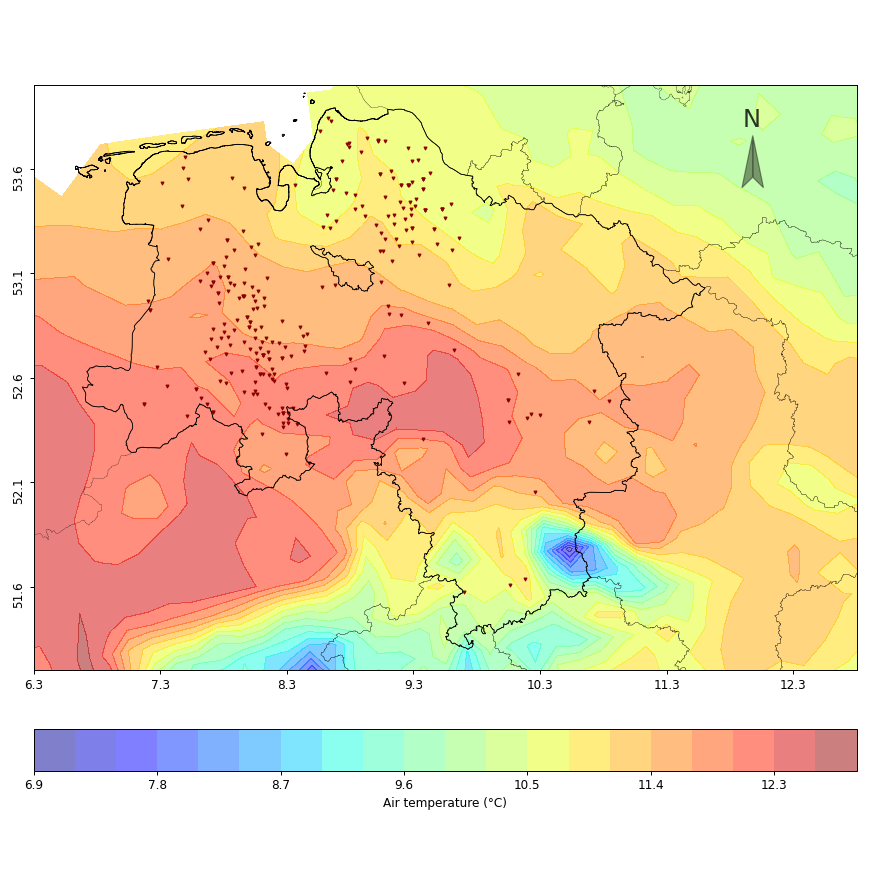

In [314]:
#Longitude and latitude from the precipitation file \
# but used for relative humidity since both datasets have the same dimensions
lon = pr.lon
lat = pr.lat

#Clip the nc by the bounding plot
i0, i1=217, 247  #index of lat
j0, j1 =191, 232  #index of lon

lat_bd, lon_bd= [51.2,54], [6.3,12.8]
lat_inds=np.where((lat>lat_bd[0]) & (lat < lat_bd[1]))
lon_inds=np.where((lon>lon_bd[0]) & (lon < lon_bd[1]))

#NSmap= germany_states.boundary.plot( figsize=(8, 8), alpha=0.5, edgecolor='k', linewidth=1)
#plt.contourf(lon[:], lat[:], pr.data['pr'][0,:,:], 20, cmap=plt.get_cmap('Oranges'))

germany_states = gpd.read_file(rpath+"/SHP/DEU_adm1.shp")
GWF=gpd.read_file(rpath+"/SHP/GWF.shp")

NS=germany_states[germany_states.NAME_1== "Niedersachsen"]
GWF=GWF.to_crs(epsg=4326)
germany=germany_states.boundary.plot(figsize=(10,10), edgecolor='k', lw=0.2)
NS_plot=NS.boundary.plot(figsize=(15,15), edgecolor='k', lw=0.7, ax=germany)
cf=plt.contourf(lon[i0:i1,j0:j1], 
             lat[i0:i1,j0:j1],
             tm.data['tas'][-10,i0:i1,j0:j1], 
             20, cmap=plt.get_cmap('jet'), alpha=0.5)
GWF.plot(ax=NS_plot,marker='v', color='darkred', markersize=5, label="GW")
fig= germany.get_figure()


limx=6.3
limy=51.2
germany.set_xlim(6.3, 12.8)
germany.set_ylim(51.2, 54)
germany.tick_params(axis='y', which='major', labelsize=10, rotation=90)
germany.tick_params(axis='x', which='major', labelsize=10, rotation=0)
startx, endx = germany.get_xlim()
starty, endy = germany.get_ylim()
stepsizex=1
stepsizey=0.5
germany.xaxis.set_ticks(np.arange(startx, endx, stepsizex))
germany.yaxis.set_ticks(np.arange(starty+.4, endy, stepsizey))

#divider= make_axes_locatable(germany)
#cax=divider.append_axes("right", size="5%", pad=0.01)
cbar=fig.colorbar(cf, orientation="horizontal", pad=0.07)
cbar.ax.set_xlabel("Air temperature (°C)")
fig.tight_layout()

#North arrow
arrx=11.9
arry=53.8
germany.text(x=arrx, y=arry, s='N', fontsize=20,alpha=0.8)
germany.arrow(arrx+0.08, arry-0.05, 0, 0.01, length_includes_head=True,
          head_width=0.17, head_length=0.25, overhang=.2, ec="k",facecolor='k', alpha=0.4)

## Relative humidity

<IPython.core.display.Javascript object>


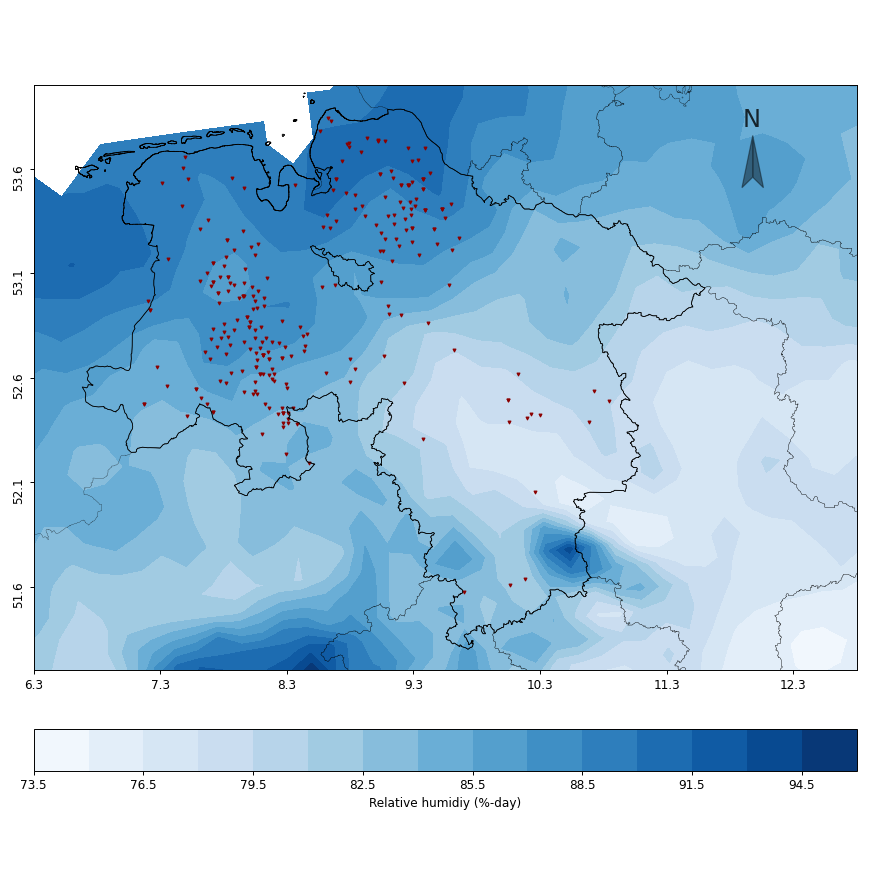

In [318]:
#Longitude and latitude from the precipitation file \
# but used for relative humidity since both datasets have the same dimensions
lon = pr.lon
lat = pr.lat

#Clip the nc by the bounding plot
i0, i1=217, 247  #index of lat
j0, j1 =191, 232  #index of lon

lat_bd, lon_bd= [51.2,54], [6.3,12.8]
lat_inds=np.where((lat>lat_bd[0]) & (lat < lat_bd[1]))
lon_inds=np.where((lon>lon_bd[0]) & (lon < lon_bd[1]))

#NSmap= germany_states.boundary.plot( figsize=(8, 8), alpha=0.5, edgecolor='k', linewidth=1)
#plt.contourf(lon[:], lat[:], pr.data['pr'][0,:,:], 20, cmap=plt.get_cmap('Oranges'))

germany_states = gpd.read_file(rpath+"/SHP/DEU_adm1.shp")
GWF=gpd.read_file(rpath+"/SHP/GWF.shp")

NS=germany_states[germany_states.NAME_1== "Niedersachsen"]
GWF=GWF.to_crs(epsg=4326)
germany=germany_states.boundary.plot(figsize=(10,10), edgecolor='k', lw=0.2)
NS_plot=NS.boundary.plot(figsize=(15,15), edgecolor='k', lw=0.7, ax=germany)
cf=plt.contourf(lon[i0:i1,j0:j1], 
             lat[i0:i1,j0:j1],
             rh.data['hurs'][-10,i0:i1,j0:j1], 
             20, cmap=plt.get_cmap('Blues'))
GWF.plot(ax=NS_plot,marker='v', color='darkred', markersize=5, label="GW")
fig= germany.get_figure()


limx=6.3
limy=51.2
germany.set_xlim(6.3, 12.8)
germany.set_ylim(51.2, 54)
germany.tick_params(axis='y', which='major', labelsize=10, rotation=90)
germany.tick_params(axis='x', which='major', labelsize=10, rotation=0)
startx, endx = germany.get_xlim()
starty, endy = germany.get_ylim()
stepsizex=1
stepsizey=0.5
germany.xaxis.set_ticks(np.arange(startx, endx, stepsizex))
germany.yaxis.set_ticks(np.arange(starty+.4, endy, stepsizey))

#divider= make_axes_locatable(germany)
#cax=divider.append_axes("right", size="5%", pad=0.01)
cbar=fig.colorbar(cf, orientation="horizontal", pad=0.07)
cbar.ax.set_xlabel("Relative humidiy (%-day)")
fig.tight_layout()

#North arrow
arrx=11.9
arry=53.8
germany.text(x=arrx, y=arry, s='N', fontsize=20,alpha=0.8)
germany.arrow(arrx+0.08, arry-0.05, 0, 0.01, length_includes_head=True,
          head_width=0.17, head_length=0.25, overhang=.2, ec="k",facecolor='k', alpha=0.4)

## Plot data extracted from the HYRAS dataset

After the extraction, there is a time series of each climatic variable per station

In [337]:
#Load the pickle data
datapr= pd.read_pickle(rpath+"Pickle/datapr.pkl")
datarh= pd.read_pickle(rpath+"Pickle/datarh.pkl")
datatm= pd.read_pickle(rpath+"Pickle/datatm.pkl")

In [344]:
datapr

,ID,lon,lat,time,cdata
0,9610009,241,206,"[1951-01-01, 1951-01-02, 1951-01-03, 1951-01-0...","[3.4330375, 3.9143252, 0.12493418, 2.2154684, ..."
1,9610749,237,207,"[1951-01-01, 1951-01-02, 1951-01-03, 1951-01-0...","[2.4444647, 3.7246683, 0.24155205, 1.6513351, ..."
2,9610875,241,204,"[1951-01-01, 1951-01-02, 1951-01-03, 1951-01-0...","[3.8373752, 5.0978723, 0.35081756, 3.1075406, ..."
3,9700007,235,202,"[1951-01-01, 1951-01-02, 1951-01-03, 1951-01-0...","[2.9198732, 1.7250444, 0.39742857, 2.4871345, ..."
4,9700020,236,204,"[1951-01-01, 1951-01-02, 1951-01-03, 1951-01-0...","[2.873279, 2.7192166, 1.129807, 2.053268, 8.63..."
...,...,...,...,...,...
259,400080201,243,210,"[1951-01-01, 1951-01-02, 1951-01-03, 1951-01-0...","[3.0958781, 5.316837, 0.30433223, 2.2475283, 1..."
260,9896004,239,200,"[1951-01-01, 1951-01-02, 1951-01-03, 1951-01-0...","[3.1240494, 2.5373049, 1.1976043, 3.6188817, 7..."
261,40000327,229,210,"[1951-01-01, 1951-01-02, 1951-01-03, 1951-01-0...","[1.3233159, 1.7508082, 0.33620006, 0.4141265, ..."
262,9700203,235,202,"[1951-01-01, 1951-01-02, 1951-01-03, 1951-01-0...","[2.9198732, 1.7250444, 0.39742857, 2.4871345, ..."


<IPython.core.display.Javascript object>


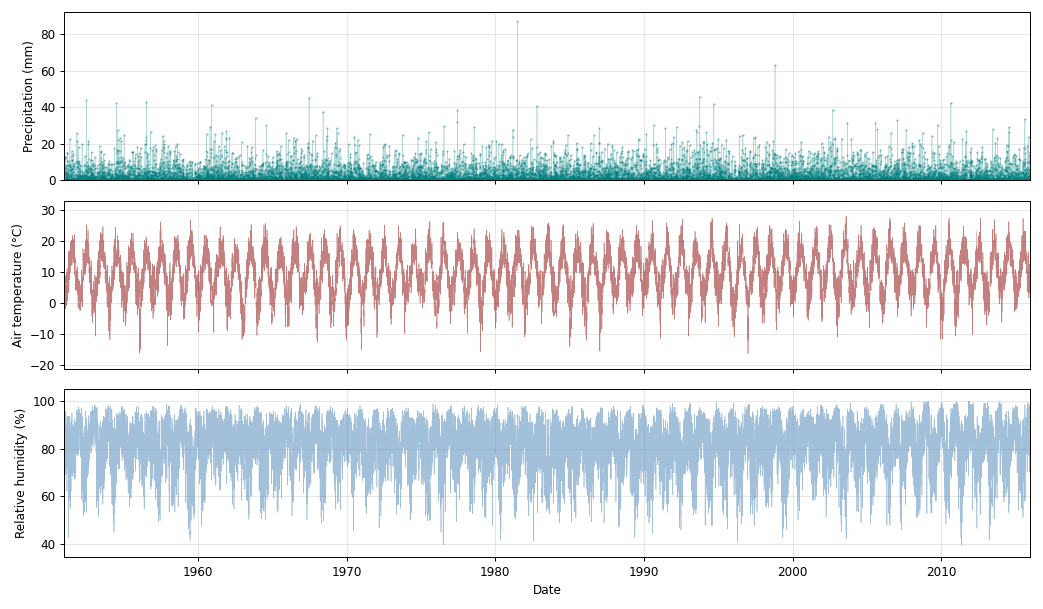

In [377]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,7),sharex=True)
ax1.plot(datapr.time[i],datapr.cdata[i], marker=".",
             markersize="2",linewidth="0.5", color="teal", alpha=0.3)
ax1.set_ylabel("Precipitation (mm)")
ax1.set_ylim(0,max(datapr.cdata[i])+5)
ax1.set_xlim(min(datapr.time[i]),max(datapr.time[i]))
ax1.grid(True, alpha=0.3)


ax2.plot(datapr.time[i],datatm.cdata[i],
             markersize="2",linewidth="0.5", color="darkred", alpha=0.5)

ax2.set_ylabel("Air temperature (°C)")
ax2.set_ylim(min(datatm.cdata[i])-5,max(datatm.cdata[i])+5)
ax2.set_xlim(min(datatm.time[i]),max(datatm.time[i]))
ax2.grid(True, alpha=0.3)


ax3.plot(datapr.time[i],datarh.cdata[i], 
             markersize="2",linewidth="0.5", color="steelblue", alpha=0.5)

ax3.set_ylabel("Relative humidity (%)")
ax3.set_xlabel("Date")
ax3.set_ylim(min(datarh.cdata[i])-5,max(datarh.cdata[i])+5)
ax3.set_xlim(min(datarh.time[i]),max(datarh.time[i]))
ax3.grid(True, alpha=0.3)

fig.tight_layout()




<IPython.core.display.Javascript object>


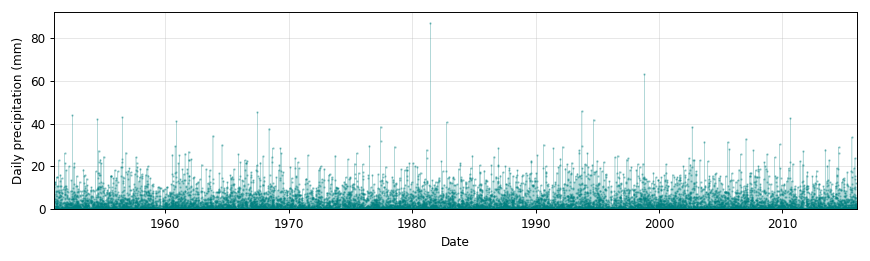

In [362]:
#Single plot
i=6
plt.figure(figsize=(10,3))
plt.plot(datapr.time[i],datapr.cdata[i], marker=".",
             markersize="2",linewidth="0.5", color="teal", alpha=0.3)

plt.ylabel("Daily precipitation (mm)")
plt.xlabel("Date")
plt.ylim(0,max(datapr.cdata[i])+5)
plt.xlim(min(datapr.time[i]),max(datapr.time[i]))
plt.grid(True, alpha=0.3)
plt.tight_layout()
